# Финальное задание курса

В итоговом задании курса мы предлагаем вам решить задачу регрессии - по характеристикам поездок на такси в Нью-Йорке научиться определять их стоимость.

В задании две части:

* первая часть - обычная. Так устроены все ноутбуки с домашними заданиями в курсе. Мы что-то просим - вы делаете. Задания этой части как обычно проверяются тестами на Stepik

* вторая часть - творческая. В этой части мы даем вам лишь идеи того, что можно сделать, а все остальное - на вас. Это задание проверяется в виде текстового отчета (подробности смотрите в описании второй части задания)

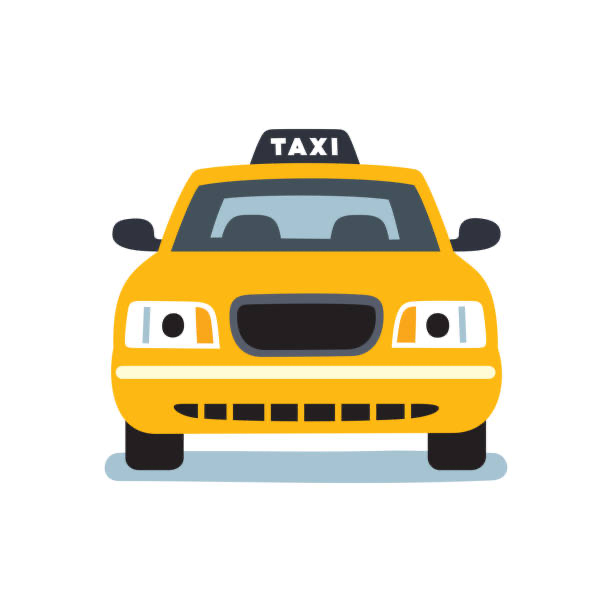

# Часть 1

In [109]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Считаем данные

In [110]:
df = pd.read_csv("https://www.dropbox.com/s/glmbcyopi24m2ni/final_project_data.csv?dl=1")

df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2011-11-23 14:36:35.0000003,2011-11-23 14:36:35 UTC,-73.959075,40.783316,-73.959087,40.783345,1.0,2.5
1,2013-09-14 21:40:00.00000016,2013-09-14 21:40:00 UTC,-73.931612,40.771060,-73.929097,40.760542,1.0,5.5
2,2012-04-30 18:13:19.0000002,2012-04-30 18:13:19 UTC,-73.997929,40.740983,-74.007197,40.727725,2.0,6.5
3,2010-10-22 15:03:47.0000001,2010-10-22 15:03:47 UTC,-73.980608,40.742449,-73.985609,40.755807,1.0,6.5
4,2011-02-18 18:08:16.0000002,2011-02-18 18:08:16 UTC,-74.008884,40.720314,-73.983280,40.722350,1.0,12.1


## Исследование данных

### Quiz

Сколько строк в таблице df?

In [111]:
df.shape[0]

615962

### Quiz

Есть ли пропущенные значения в таблице? В скольких столбцах есть пропуски?

In [112]:
df.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      1
dropoff_longitude    3
dropoff_latitude     3
passenger_count      1
fare_amount          1
dtype: int64

### Quiz

Удалите строки с пропущенными значениями из таблицы. Сколько строк осталось в таблице?

In [113]:
df = df.dropna()

In [114]:
df.shape[0]

615959

Удалите из данных колонку `key`, так как в ней дублируется информация из `pickup_datetime`

In [115]:
df = df.drop('key', axis=1)

Обработайте колонку `pickup_datetime`. Выделите из нее 4 новых столбца:

* `year` - год поездки
* `month` - месяц поездки
* `day` - день поездки
* `hour` - час поездки. Час вычисляйте так: если до следующего часа осталось меньше 30 минут (на секунды не смотрим), что час округляете до следующего.

Пример: 14:18:20 -> 14 часов, 17:48:29 -> 18 часов

Затем удалите столбец `pickup_datetime`.



In [116]:
df['pickup_datetime'].sample(15)

250803    2012-06-06 14:31:10 UTC
487218    2010-06-24 07:00:35 UTC
147510    2009-08-23 05:17:07 UTC
326340    2011-09-16 22:22:57 UTC
116134    2009-09-17 13:38:00 UTC
119946    2013-02-11 19:13:00 UTC
106332    2010-12-08 20:15:11 UTC
269090    2009-08-30 18:42:59 UTC
528471    2013-01-08 21:12:09 UTC
396500    2014-06-30 16:48:44 UTC
13940     2014-10-02 09:40:00 UTC
330142    2009-05-28 22:33:26 UTC
62914     2014-06-13 08:36:00 UTC
476512    2009-09-20 02:06:23 UTC
508433    2015-02-02 20:11:41 UTC
Name: pickup_datetime, dtype: object

In [117]:
df['year'] = df['pickup_datetime'].apply(lambda x: x.split('-')[0])
df['mounth'] = df['pickup_datetime'].apply(lambda x: x.split('-')[1])
df['day'] = df['pickup_datetime'].apply(lambda x: x[8:10])
df['hour'] = df['pickup_datetime'].apply(lambda x: int(x[11:13])+1 if int(x[14:16]) >= 30 else int(x[11:13]))
df = df.drop('pickup_datetime', axis=1)
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,year,mounth,day,hour
0,-73.959075,40.783316,-73.959087,40.783345,1.0,2.5,2011,11,23,15
1,-73.931612,40.771060,-73.929097,40.760542,1.0,5.5,2013,09,14,22
2,-73.997929,40.740983,-74.007197,40.727725,2.0,6.5,2012,04,30,18
3,-73.980608,40.742449,-73.985609,40.755807,1.0,6.5,2010,10,22,15
4,-74.008884,40.720314,-73.983280,40.722350,1.0,12.1,2011,02,18,18


## Вопросы по данным

### Quiz

В какие годы совершались поездки?

In [118]:
df['year'].value_counts().sort_index()

2009    94465
2010    93419
2011    97898
2012    99060
2013    96329
2014    92051
2015    42737
Name: year, dtype: int64

### Quiz

В какой час было совершено больше всего поездок?

In [119]:
df['hour'].mode()

0    19
Name: hour, dtype: int64

### Quiz

В какой сезон (зима, весна, лето, осень) было совершено наименьшее число поездок?

In [120]:

winter_order = df['mounth'].value_counts().sort_index().iloc[[0, 1, 11]].sum()
spring_order = df['mounth'].value_counts().sort_index().iloc[[2, 3, 4]].sum()
summer_order = df['mounth'].value_counts().sort_index().iloc[[5, 6, 7]].sum()
autumn_order = df['mounth'].value_counts().sort_index().iloc[[8, 9, 10]].sum()
print(winter_order, spring_order, summer_order, autumn_order)

153973 172242 146371 143373


Постройте scatter plot в осях `pickup_latitude` и `pickup_longitude`

Text(0, 0.5, 'pickup_longitude')

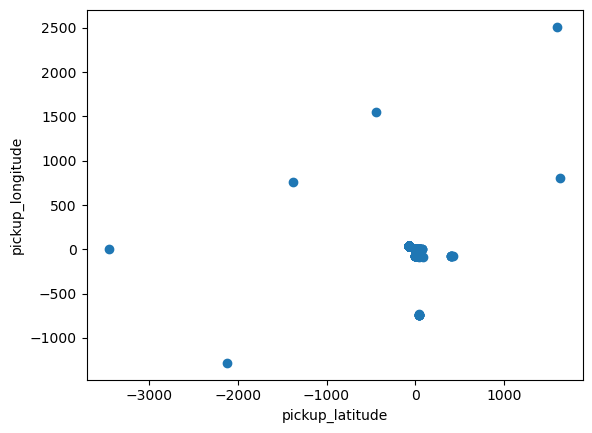

In [121]:
plt.scatter(x = df['pickup_latitude'], y = df['pickup_longitude'])
plt.xlabel('pickup_latitude')
plt.ylabel('pickup_longitude')

### Quiz

Постройте ящик с усами boxplot для `pickup_longitude`. Есть ли на визуализации выбросы? (отдельные точки)

In [122]:
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x1788f3a53f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1788f3a5930>,
 'boxes': [<matplotlib.lines.Line2D at 0x1788f3a5150>],
 'medians': [<matplotlib.lines.Line2D at 0x1788f3a5e70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1788f3a6110>],
 'means': []}

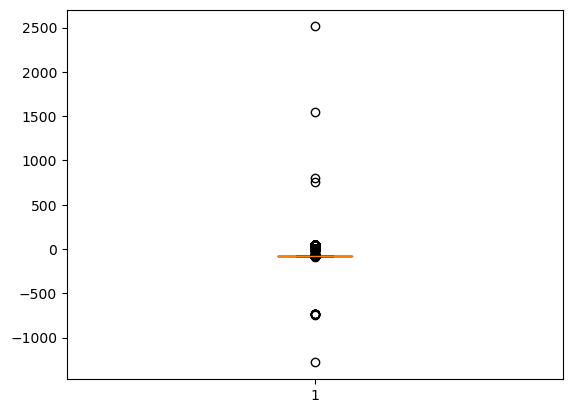

In [123]:
plt.boxplot(df['pickup_longitude'])

### Quiz

Чему равна медиана `pickup_longitude`? Ответ округлите до тысячных.

In [124]:
round(df['pickup_longitude'].median(), 3)

-73.982

Постройте гистограмму распределения признака `hour`.

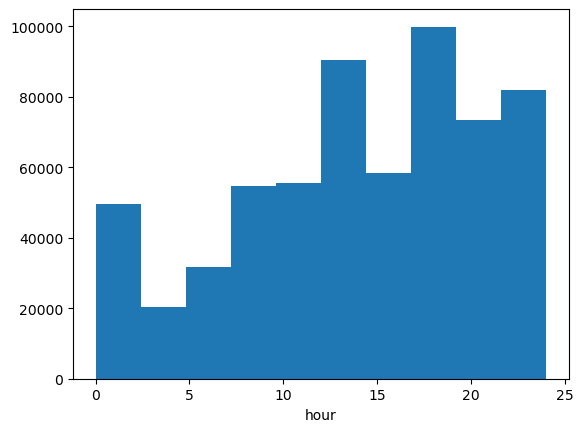

In [125]:
plt.hist(df['hour'])
plt.xlabel('hour')
plt.show()

## Построение baseline-модели

Разбейте `df` на матрицу объект-признак `X` и вектор с целевой переменной `y`. Целевая переменная - столбец `fare_amount`.

In [126]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

Разбейте данные на тренировочную и тестовую части с помощью train_test_split.

Тестовая часть - 25% всех данных, `random_state=42`.

Сколько строк в матрице `X_train`?

In [131]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [132]:
Xtrain.shape[0]

461969

### Quiz

Обучите решающее дерево глубины 3 на тренировочных данных и вычислите ошибку $R^2$ на тесте. Ответ округлите до сотых.

Зафиксируйте у дерева `random_state=42`.

In [134]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

tree = DecisionTreeRegressor(random_state=42, max_depth=3)
tree.fit(Xtrain, ytrain)
ypred_tree = tree.predict(Xtest)
r2_score(ytest, ypred_tree)

0.4998349394485503

### Quiz

Постройте гистограмму важности признаков.

Какой признак имеет наибольший вес?

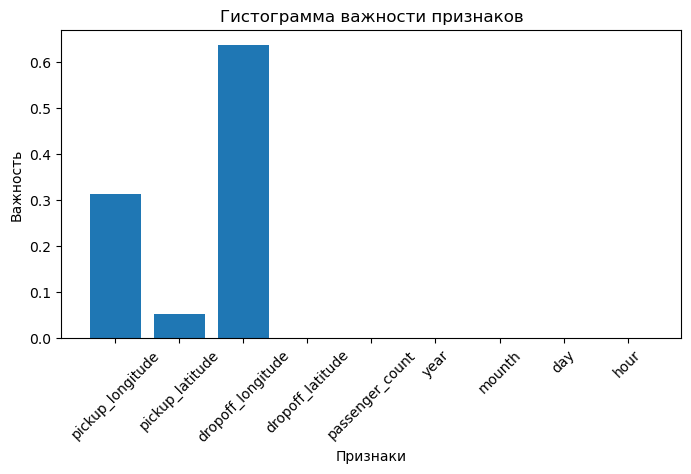

In [139]:
plt.figure(figsize=(8, 4))
plt.bar(X.columns, tree.feature_importances_)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Гистограмма важности признаков')
plt.xticks(rotation=45)
plt.show()


## Улучшение модели

### Quiz

Постройте гистограмму распределения целевой переменной `y`, укажите параметр `bins=100`.

Является ли распределение нормальным?

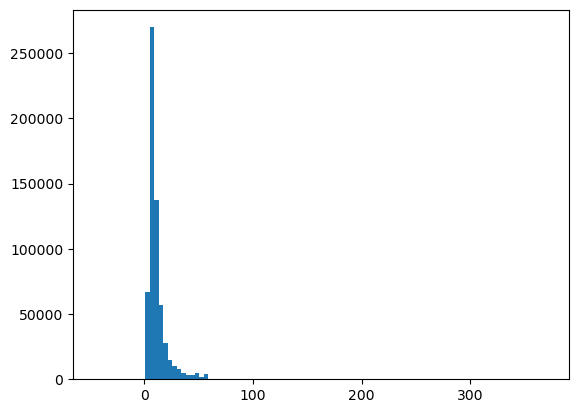

In [141]:
plt.hist(y, bins=100)
plt.show()

Замените все значения $y$, меньшие 0, на 0.

Сделайте преобразование целевой переменной по правилу $y_{new} = np.log1p(y)$

Заново разбейте данные на тренировочную и тестовую часть по тем же правилам, что и раньше, но теперь используйте `X` и `y_new`.

In [148]:
y = y.apply(lambda x: 0 if x < 0 else x)
y_new = np.log1p(y)

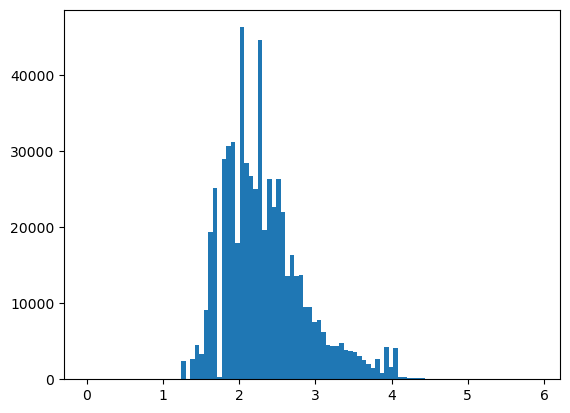

In [149]:
plt.hist(y_new, bins=100)
plt.show()

### Quiz

Заново обучите решающее дерево глубины 3 с `random_state=42` на тренировочных данных и вычислите $R^2$ на тесте. Ответ округлите до сотых.

Перед вычислением $R^2$ сделайте обратное преобразование от прогноза: `np.expm1(pred)` и от `y_test`.

**Важно:** дальше мы будем работать с преобразованной целевой переменной, поэтому при вычислении $R^2$ во всех заданиях ниже делайте обратное преобразование.

In [150]:

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_new, test_size=0.25, random_state=42)

In [151]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

tree = DecisionTreeRegressor(random_state=42, max_depth=3)
tree.fit(Xtrain, ytrain)
ypred_tree = tree.predict(Xtest)
r2_score(np.expm1(ytest), np.expm1(ypred_tree))

0.4434601265690865

### Quiz


Подберите по кросс-валидации на тренировочных данных глубину дерева в диапазоне от 3 до 10 включительно с шагом 1 (`random_state=42`).

`cv=3, scoring=r2`

Затем примените модель с оптимальной глубиной на тесте и вычислите $R^2$. Ответ округлите до сотых.

Перед вычислением $R^2$ не забудьте (как и дальше) делать преобразование `np.expm1`

In [152]:
from sklearn.model_selection import cross_val_score, GridSearchCV

params = {
    'max_depth' : range(3,11)
}

gs = GridSearchCV(DecisionTreeRegressor(random_state=42), params, cv=3, scoring='r2' )
gs.fit(Xtrain, ytrain)

print(gs.best_estimator_)

DecisionTreeRegressor(max_depth=10, random_state=42)


In [154]:
ypred_tree = gs.best_estimator_.predict(Xtest) 
r2_score(np.expm1(ytest), np.expm1(ypred_tree))

0.6866129535024197

## Усложнение пайплайна

Создайте pipeline, в котором сначала извлеките полиномиальные признаки степени 2 из данных, а затем обучите решающее дерево глубины 3 с `random_state=42`.

In [155]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

p1 = Pipeline([
    ('features', PolynomialFeatures(degree=2)),
    ('model', DecisionTreeRegressor(max_depth=3, random_state=42))
])

### Quiz

Обучите pipeline на тренировочных данных, сделайте прогноз на тесте и вычислите $R^2$. Ответ округлите до сотых.

In [157]:
p1.fit(Xtrain, ytrain)
ypred_p1 = p1.predict(Xtest)
r2_score(np.expm1(ytest), np.expm1(ypred_p1))


0.4173231422216578

При помощи GridSearchCV с теми же гиперпараметрами, что и раньше, подберите глубину дерева внутри пайплайна в диапазоне от 3 до 10 включительно с шагом 1.

In [159]:
params = {
    'model__max_depth' : range(3, 11)
}


gs = GridSearchCV(p1, params, scoring='r2', cv=3)
gs.fit(Xtrain, ytrain)

gs.best_estimator_

Pipeline(steps=[('features', PolynomialFeatures()),
                ('model',
                 DecisionTreeRegressor(max_depth=10, random_state=42))])

In [160]:
gs.best_score_

0.6660203321842192

In [162]:
ypred_gs = gs.best_estimator_.predict(Xtest) 
r2_score(np.expm1(ytest), np.expm1(ypred_gs))

0.7164224883777127

## Feature selection

Добавьте в предыдущий пайплайн:
* после добавления полиномиальных признаков - StandardScaler
* затем - снижение размерности при помощи метода `SelectFromModel` с моделью `Ridge` с гиперпараметрами по умолчанию.

In [166]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, Ridge

p2 = Pipeline([
    ('features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(Ridge())),
    ('model', DecisionTreeRegressor(max_depth=3, random_state=42))
])

Обучите пайплайн на тренировочных данных, сделайте прогноз на тесте и вычислите для него $R^2$.

In [167]:
p2.fit(Xtrain, ytrain)
ypred_p2 = p2.predict(Xtest)
r2_score(np.expm1(ytest), np.expm1(ypred_p2))

0.4055617838636334

Подберите глубину решающего дерева в пайплайне, в том же диапазоне и теми же гиперпараметрами GridSearch, что и в предыдущих заданиях.

Вычислите $R^2$ на тестовых данных, ответ округлите до сотых.

In [ ]:
params = {
    'model__max_depth' : range(3, 11)
}


gs_p2 = GridSearchCV(p1, params, scoring='r2', cv=3)
gs_p2.fit(Xtrain, ytrain)

gs_p2.best_estimator_

In [ ]:
ypred_gs_p2 = gs_p2.best_estimator_.predict(Xtest) 
r2_score(np.expm1(ytest), np.expm1(ypred_gs_p2))

### Quiz

Удалось ли при помощи пайплайна с отбором признаков улучшить результат предыдущей лучшей модели?

**Ответ:** Нет, не удалось

## Кодирование категориальных признаков

Признаки `month`, `day`, `hour` - категориальные (подумайте почему!)

Поэтому их можно попробовать закодировать.

Попробуем подход: группировка значений признака + дальнейшая OneHot-кодировка.

* Создайте колонки `winter`, `spring`, `summer`, `autumn` - в каждую из которых пишите 1, если месяц относится к сезону, и 0 иначе.

* Создайте колонки `start_month`, `middle_month`, `end_month` - в каждую колонку пишите 1, если день относится к началу месяца (1-10 число), середине месяца (11-20 число), концу месяца (от 21 числа), и 0 иначе.

* Создайте колонки `night`, `morning`, `day`, `evening` по аналогии. Если час - от 23 до 5, то это `night`, от 6 до 11 - `morning`, от 12 до 16 - `day`, от 17 до 22 - `evening`.

После создания новых колонок удалите колонки `month`, `day`, `hour`.

P.S. Отдельно делайте преобразования для X_train и для X_test, чтобы заново не разбивать данные.

In [176]:
#Создадим колонки winter, spring, summer, autumn
df['winter'] = df['mounth'].apply(lambda x: 1 if x in ['01','02', '12'] else 0)
df['spring'] = df['mounth'].apply(lambda x: 1 if x in ['03','04', '05'] else 0)
df['summer'] = df['mounth'].apply(lambda x: 1 if x in ['06','07', '08'] else 0)
df['autumn'] = df['mounth'].apply(lambda x: 1 if x in ['09','10', '11'] else 0)
df = df.drop('mounth', axis=1)

In [188]:
#Создадим колонки start_month, middle_month, end_month
df['start_month'] = df['day'].apply(lambda x: 1 if int(x) in range(1,11) else 0)
df['middle_month'] = df['day'].apply(lambda x: 1 if int(x) in range(11,21) else 0)
df['end_month'] = df['day'].apply(lambda x: 1 if int(x) > 20 else 0)
df = df.drop('day', axis=1)

In [195]:
#Создадим колонки month, day, hour
df['night'] = df['hour'].apply(lambda x: 1 if x in [23, 0, 1, 2, 3, 4, 5] else 0)
df['morning'] = df['hour'].apply(lambda x: 1 if x in range(6, 12) else 0)
df['day'] = df['hour'].apply(lambda x: 1 if x in range(12, 17) else 0)
df['evening'] = df['hour'].apply(lambda x: 1 if x in range(17, 23) else 0)
df = df.drop('hour', axis=1)

### Quiz

На сколько признаков стало больше в матрице-объект признак после добавления закодированных категориальных столбцов и удаления исходных категориальных столбцов?

In [199]:
X = df.drop('fare_amount', axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_new, random_state=42, test_size=0.25)

Подберите при помощи GridSearch с теми же гиперпараметрами, что и выше, оптимальную глубину дерева в диапазоне от 3 до 10 включительно (с шагом 1). У дерева `random_state=42`.

In [200]:
params = {
    'max_depth' : range(3, 11)
}

gs_tree = GridSearchCV(DecisionTreeRegressor(), params, scoring='r2', cv=3)
gs_tree.fit(Xtrain, ytrain)

ypred_gs = gs_tree.best_estimator_.predict(Xtest)
r2_score(np.expm1(ytest), np.expm1(ypred_gs))

0.6882641207743401

Постройте гистограмму важности признаков для полученной модели (лучшей по GridSearch).

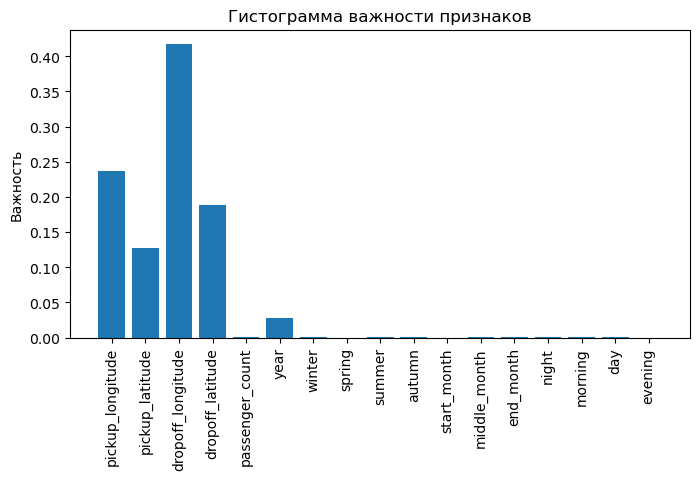

In [206]:
plt.figure(figsize=(8, 4))
plt.bar(X.columns, gs_tree.best_estimator_.feature_importances_)
# plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Гистограмма важности признаков')
plt.xticks(rotation=90)
plt.show()

### Quiz

Какой из признаков, связанных с датой поездки, самый важный для модели? **Ответ:** year

## Кластеризация и визуализация

Оставьте только те строчки в таблице df (после удаления пропусков), для которых выполнены оба условия:

* `dropoff_latitude` $\in (39;41)$
* `dropoff_longitude` $\in (-75;-72)$

### Quiz

Сколько строк осталось в таблице?

In [217]:
df = df.query('(39 < dropoff_latitude < 41) and (-75 < dropoff_longitude < -72)')

In [218]:
df.shape[0]

603729

Разбейте все поездки по признакам `dropoff_latitude`, `dropoff_longitude` на 5 кластеров.

Используйте kmeans c `random_state=42`.

Визуализируйте поездки из таблицы df в осях `dropoff_latitude`, `dropoff_longitude` - покрасьте точки в цвета, соответствующие кластерам.

In [219]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df[['dropoff_latitude', 'dropoff_longitude']])
df['cluster'] = kmeans.labels_

C:\Users\админ\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\админ\AppData\Local\Temp\ipykernel_18796\1891641454.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


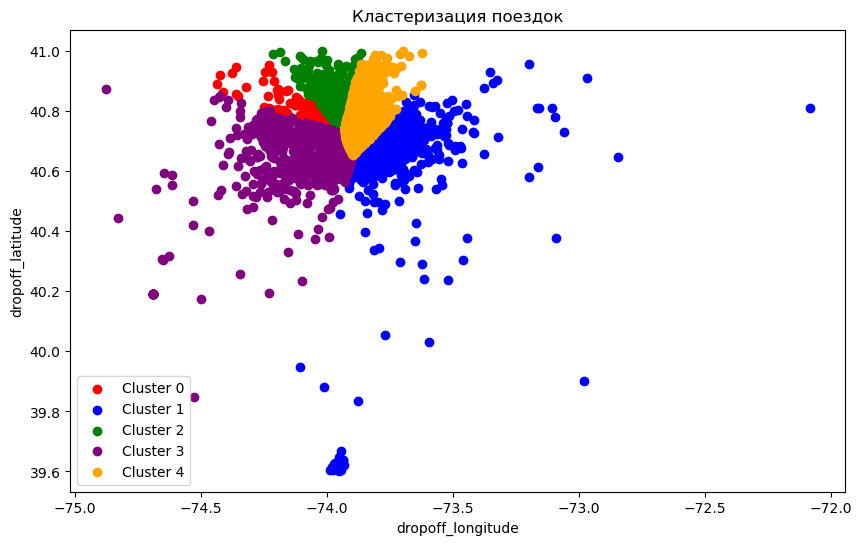

In [221]:
# Визуализация
plt.figure(figsize=(10, 6))

# Цвета для кластеров
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Проходим по каждому кластеру и отображаем его точки на графике
for cluster in range(5):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['dropoff_longitude'], cluster_data['dropoff_latitude'], color=colors[cluster], label=f'Cluster {cluster}')

plt.title('Кластеризация поездок')
plt.xlabel('dropoff_longitude')
plt.ylabel('dropoff_latitude')
plt.legend()
plt.show()

### Quiz

Для каждого кластера вычислите среднюю стоимость поездки.

Чему равна самая большая средняя стоимость поездки по кластерам? Ответ округлите до целого числа.

In [225]:
df.groupby(['cluster']).agg('fare_amount').mean()

cluster
0     9.575256
1    40.105171
2    10.326705
3    12.691351
4    23.927865
Name: fare_amount, dtype: float64

Отдельно нарисуйте кластер с наибольшей средней стоимостью поездки. В нем выделяется два островка.

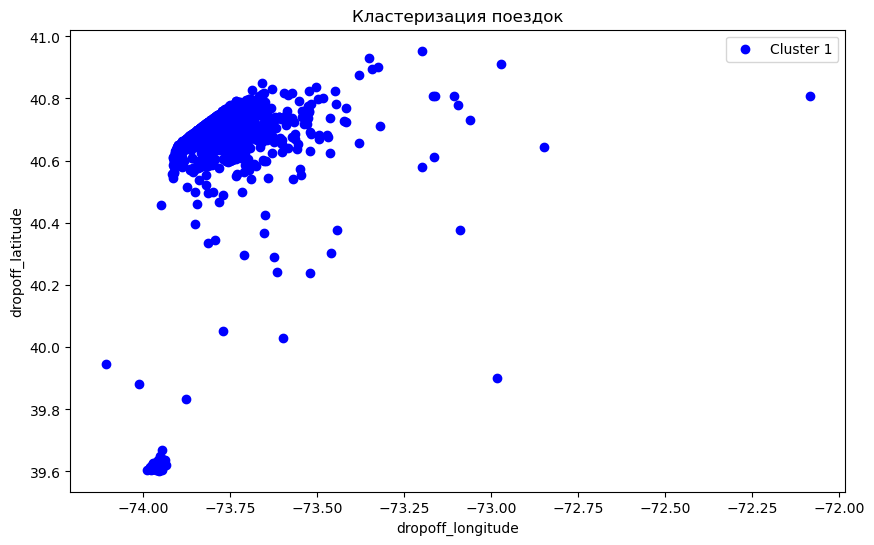

In [226]:
# Визуализация
plt.figure(figsize=(10, 6))

# Цвета для кластеров
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Проходим по каждому кластеру и отображаем его точки на графике
cluster_data = df[df['cluster'] == 1]
plt.scatter(cluster_data['dropoff_longitude'], cluster_data['dropoff_latitude'], color=colors[1], label=f'Cluster {1}')

plt.title('Кластеризация поездок')
plt.xlabel('dropoff_longitude')
plt.ylabel('dropoff_latitude')
plt.legend()
plt.show()

### Quiz

Кластеризуйте точки этого кластера при помощи DBSCAN с гиперпараметрами `eps`=0.15, `min_samples`=10.

Нарисуйте результат.

Вычислите координаты центра (среднее арифметрическое) меньшего кластера.

В ответе укажите `dropoff_latitude`, округленную до тысячных.

In [228]:
from sklearn.cluster import DBSCAN

df_cluster1 = df[['dropoff_latitude', 'dropoff_longitude']][df['cluster'] == 1] 

dbscan = DBSCAN(eps=0.15, min_samples=10)
dbscan.fit(df_cluster1)

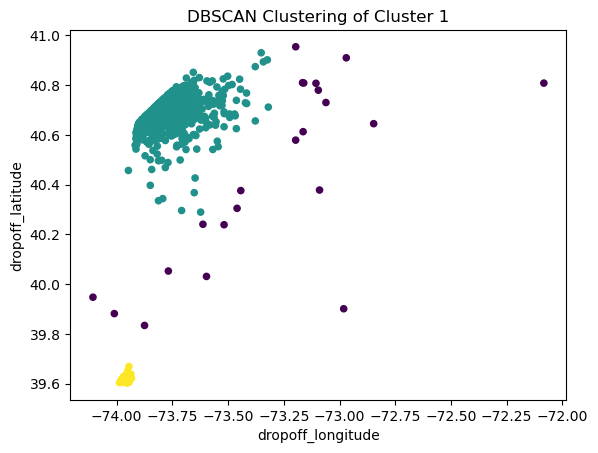

In [231]:
plt.scatter(df_cluster1['dropoff_longitude'], df_cluster1['dropoff_latitude'], c = dbscan.labels_, cmap='viridis', s=20)
plt.title('DBSCAN Clustering of Cluster 1')
plt.xlabel('dropoff_longitude')
plt.ylabel('dropoff_latitude')
plt.show()

In [236]:
# Вычисляем координаты центра меньшего кластера
smaller_cluster_center = df_cluster1[dbscan.labels_ == 1].mean()

# Выводим координаты центра меньшего кластера
print(f"Центр меньшего кластера: dropoff_latitude = {smaller_cluster_center['dropoff_latitude']:.3f}")

Центр меньшего кластера: dropoff_latitude = 39.616
